<a href="https://colab.research.google.com/github/leandrorojasguerrero/ipynb/blob/main/compraroalquilarLEANDROROJAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings #solo mostrar errores del notebook
warnings.filterwarnings('ignore')

In [ ]:
#importamos librerias
import pandas as pd #lectura y tratamiento de datos
import numpy as np #trabajar con valores numericos
import seaborn as sns #para trabajar con graficos
import matplotlib.pyplot as plt #graficos
%matplotlib inline

In [ ]:
#cargamos el archivo csv
all_data = pd.read_csv("comprar_alquilar_dataset.csv")
dataset = all_data.copy()
dataset.head(10)#visualizar los 10 primeros

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [ ]:
#solicitamos los 10 ultimos para saber cuantos son
dataset.tail()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [ ]:
#para saber información detallada de mi dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


In [ ]:
#Muestra información estadística de nuestro dataset
dataset.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [ ]:
#ver qué cantidad de muestras de comprar o alquilar se tiene en el dataset
print(dataset.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


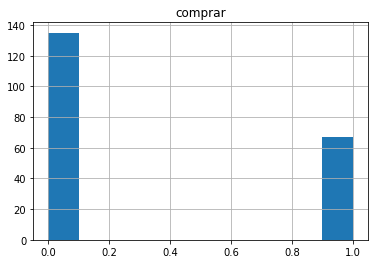

In [ ]:
#ver en una grafica la cantidad de muestras de comprar o alquilar se tiene en el dataset
dataset.hist(['comprar'])
plt.rcParams['figure.figsize'] = (15, 5)
plt.show()

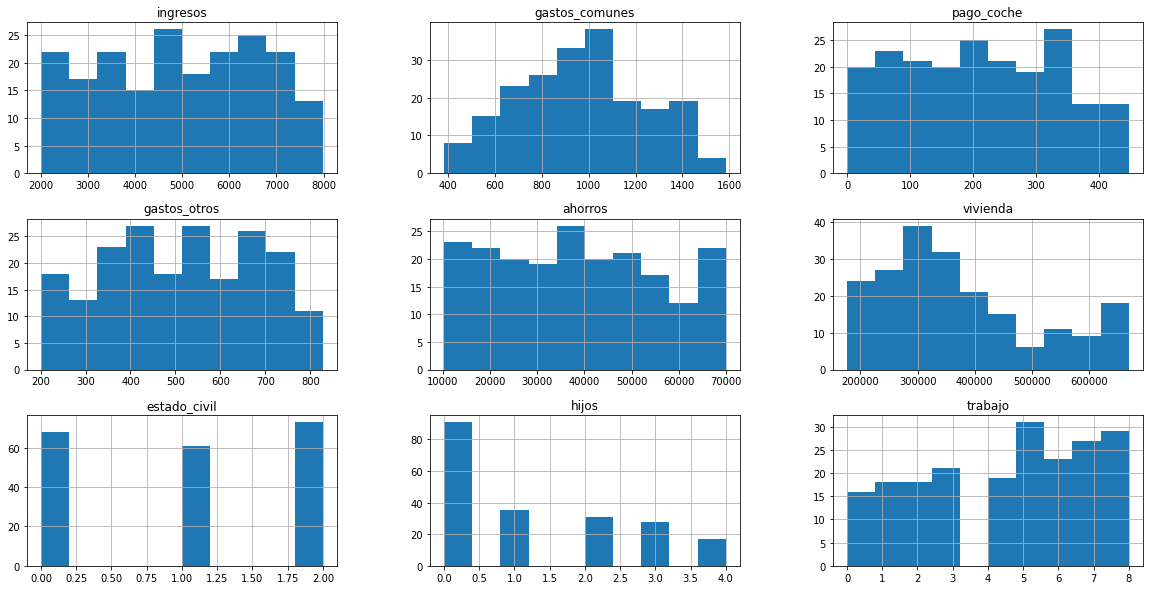

In [ ]:
# hacer histograma de las características quitando la columna de resultados (comprar)
dataset.drop(['comprar'], axis=1).hist()
plt.show()

In [ ]:
#Creo una feature llamada gastos, uniendo las columnas gastos comunes, gastos otros y pago coche 
dataset['gastos'] = dataset['gastos_comunes'] + dataset['gastos_otros']+ dataset['pago_coche']
dataset.drop(['gastos_comunes','gastos_otros','pago_coche'],axis=1,inplace=True) #Elimino las columnas que ya no me sirven
dataset.head()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos
0,6000,50000,400000,0,2,2,1,1600
1,6745,43240,636897,1,3,6,0,1496
2,6455,57463,321779,2,1,8,1,1926
3,7098,54506,660933,0,0,3,0,1547
4,6167,41512,348932,0,0,3,1,1606


In [ ]:
#creo un feature llamado financiamiento restando las culumnas vivienda - ahorros
dataset['financiamiento']=dataset['vivienda']-dataset['ahorros']
dataset.head()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiamiento
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420


In [ ]:
dataset.isnull().sum() #Verficvo los valores nulos de mi dataset : no hay valores nulos

ingresos          0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
gastos            0
financiamiento    0
dtype: int64

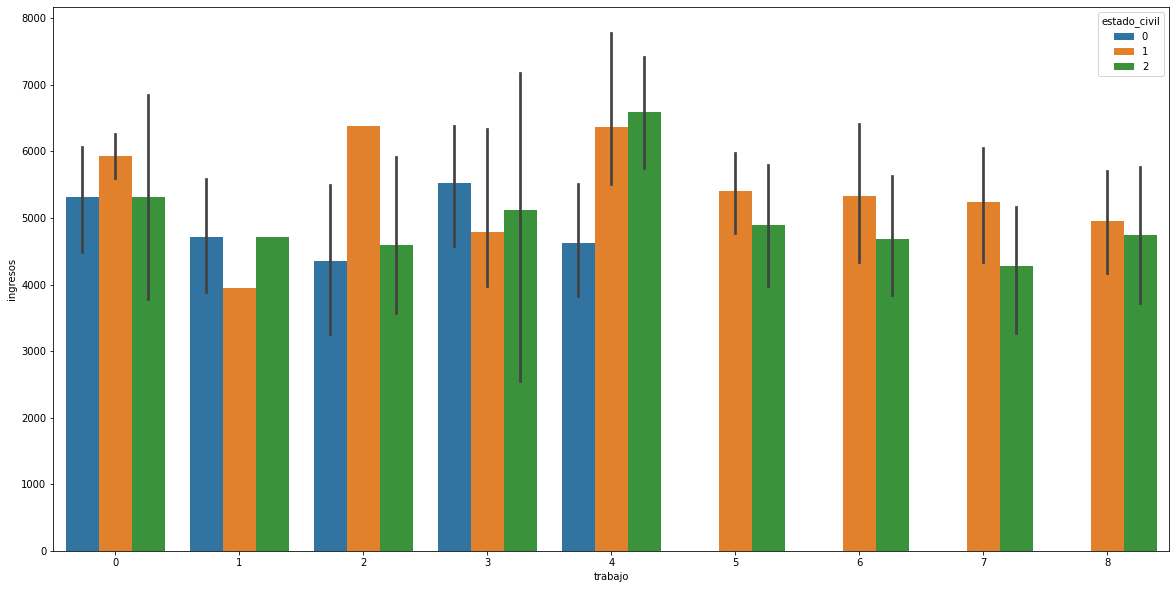

In [ ]:
#grafico la diferencia entre estado civil ingresos y trabajo 
#x = trabajo y= ingresos , estado civil
sns.barplot(dataset['trabajo'],dataset['ingresos'],dataset['estado_civil'])

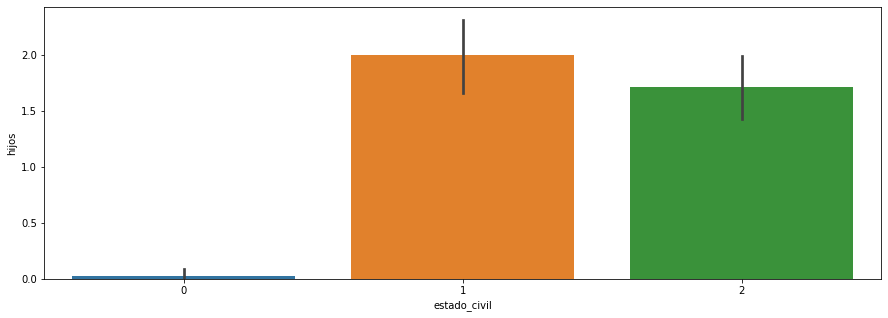

In [ ]:
#Grafico de estado civil x hijos
plt.figure(figsize=(15,5))
sns.barplot(x=dataset['estado_civil'], y=dataset['hijos'])

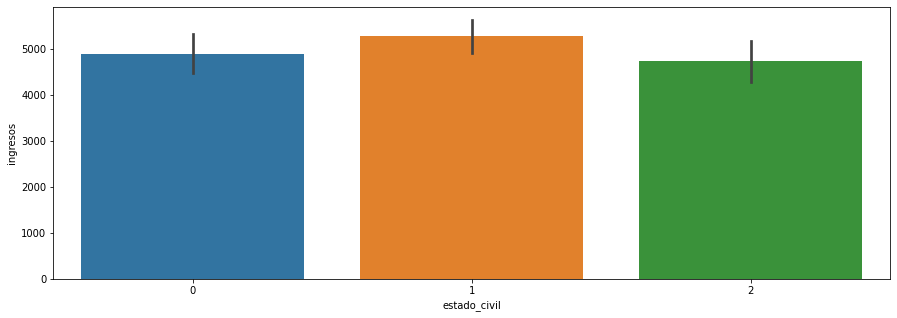

In [ ]:
#Grafico de estado civil x ingresos
plt.figure(figsize=(15,5))
sns.barplot(x=dataset['estado_civil'], y=dataset['ingresos'])

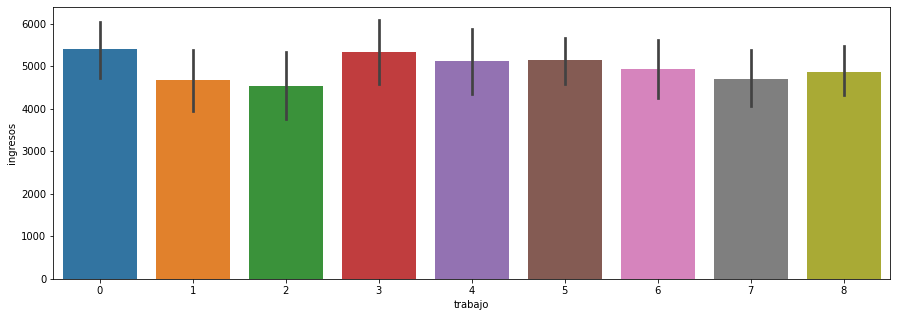

In [ ]:
#Grafico de trabajo  x ingresos
plt.figure(figsize=(15,5))
sns.barplot(x=dataset['trabajo'], y=dataset['ingresos'])

In [ ]:
dataset.sample()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiamiento
50,4952,29597,261983,1,2,7,1,2204,232386


In [ ]:
# Como la tasa es una variable numérica con una distribución sesgada por los valores ceros, usamos la transformación
# de BOX COX para buscar aproximarla a una distribución normal. Ese procedimiento entrega datos normalizados
# a los modelos lineales, que tienden a responder mejor con la entrada asi.



from scipy.stats import boxcox #importando libreria estadistica
dataset['ingresos'] = boxcox(dataset['ingresos'] + 1)[0]


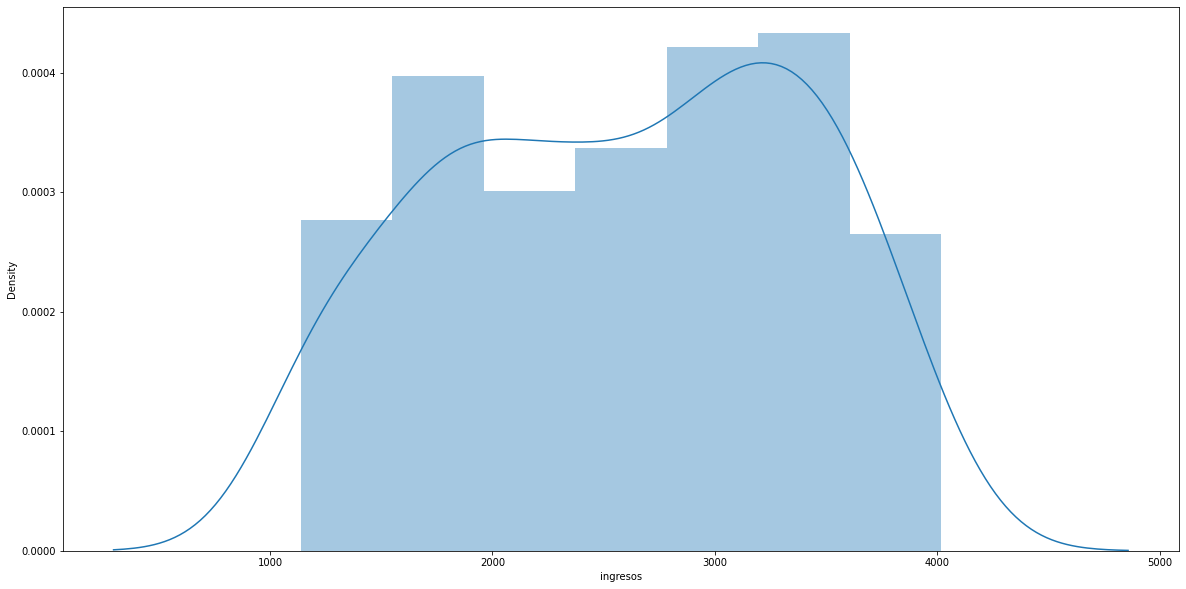

In [ ]:
# El gráfico muestra una nueva distribución de la columna 'ingresos'.
sns.distplot(dataset['ingresos'])


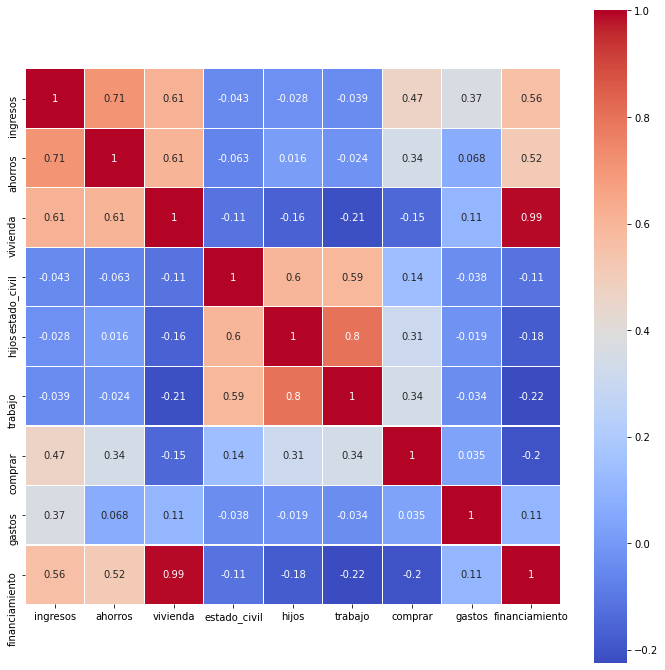

In [ ]:
plt.figure(figsize=(12,12)) 
sns.heatmap(data=dataset.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);